In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE

np.random.seed(100)

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("FullData.csv", encoding="latin-1")
df.shape

(17588, 49)

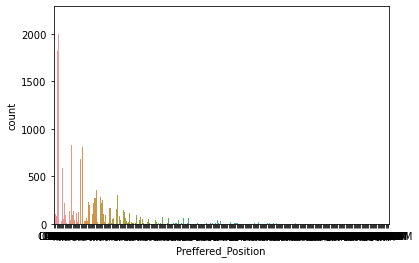

In [2]:
sns.countplot(df['Preffered_Position'])
plt.show()

In [3]:
df.head()

,Name,Nationality,Club,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,Real Madrid,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,FC Barcelona,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,FC Barcelona,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,...,77,79,84,81,83,15,9,15,9,11
3,Luis SuÃ¡rez,Uruguay,FC Barcelona,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,FC Bayern,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,...,16,14,11,47,11,91,89,95,90,89


In [4]:
#check for missing data
df.isnull().values.any()

True

In [5]:
df.columns

Index(['Name', 'Nationality', 'Club', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

In [6]:
#drop irrelevant data suchas name and birth day
df = df.drop(['Name','Nationality', 'Club', 'Club_Joining', 'Contract_Expiry', 'Height', 'Weight','Birth_Date', 'Age','Work_Rate'],axis = 1)

In [7]:
df.head(5)

,Rating,Preffered_Foot,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,94,Right,LW/ST,4,5,93,92,22,23,31,...,90,81,76,85,88,14,7,15,11,11
1,93,Left,RW,4,4,95,97,13,26,28,...,88,89,90,74,85,14,6,15,11,8
2,92,Right,LW,5,5,95,96,21,33,24,...,77,79,84,81,83,15,9,15,9,11
3,92,Right,ST,4,4,91,86,30,38,45,...,86,86,84,85,88,33,27,31,25,37
4,92,Right,GK,4,1,48,30,10,11,10,...,16,14,11,47,11,91,89,95,90,89


In [8]:
#unique pref positions
list_all = df['Preffered_Position'].str.split('/').dropna().to_numpy()
list_unique = np.unique(sum(list_all, []))
print(list_unique)

['CAM' 'CB' 'CDM' 'CF' 'CM' 'GK' 'LB' 'LM' 'LW' 'LWB' 'RB' 'RM' 'RW' 'RWB'
 'ST']


In [9]:
# copy the structure and make a duplicate of the player with the other preffered position
df_new = df.copy()
df_new.drop(df_new.index, inplace=True)

for i in list_unique:
    df_temp = df[df['Preffered_Position'].str.contains(i)]
    df_temp['Preffered_Position'] = i
    df_new = df_new.append(df_temp, ignore_index=True)
    
df_new.iloc[::1000, :]

,Rating,Preffered_Foot,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,89,Left,CAM,2,4,90,86,22,19,16,...,76,84,79,67,77,6,6,10,14,14
1000,67,Right,CAM,4,3,66,62,36,41,49,...,55,71,67,61,64,13,8,6,6,10
2000,79,Right,CB,3,2,78,59,77,76,80,...,69,70,78,69,49,14,14,15,14,13
3000,70,Right,CB,4,2,73,58,71,70,72,...,74,77,74,68,69,16,7,7,11,8
4000,65,Right,CB,2,2,38,27,67,63,65,...,26,16,22,25,23,13,11,13,15,9
5000,57,Right,CB,2,2,52,55,55,54,56,...,27,27,23,36,23,7,8,15,14,12
6000,71,Right,CDM,3,3,69,67,69,65,70,...,69,66,68,70,51,13,13,7,13,6
7000,64,Right,CDM,3,2,62,58,62,58,62,...,42,41,36,42,39,6,13,9,9,7
8000,82,Right,CM,4,2,81,75,62,70,74,...,85,82,84,80,71,10,7,10,8,10
9000,70,Right,CM,3,3,71,65,63,58,65,...,67,70,66,64,65,8,12,15,8,14


In [10]:
df = pd.get_dummies(df_new, prefix=['Preffered_Foot'], columns=['Preffered_Foot'])
df.head(5)

,Rating,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,...,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Preffered_Foot_Left,Preffered_Foot_Right
0,89,CAM,2,4,90,86,22,19,16,48,...,79,67,77,6,6,10,14,14,1,0
1,88,CAM,4,5,90,89,68,76,75,72,...,82,76,84,4,5,2,6,3,0,1
2,88,CAM,4,4,86,85,30,40,39,68,...,84,77,82,10,15,5,13,13,0,1
3,88,CAM,4,4,85,86,30,46,36,49,...,84,84,88,13,12,13,12,11,0,1
4,87,CAM,3,4,85,84,25,30,42,65,...,86,81,91,5,15,15,15,14,1,0


In [11]:
#Finalize encoding
mapping_all = {'CAM': 0 , 'CB': 1, 'CDM':2, 'CF':3, 'CM':4, 'GK':5, 'LB':6, 'LM':7, 'LW':8, 'LWB':9, 'RB':10, 'RM':11, 'RW':12, 'RWB':13,
 'ST':14}

df = df.replace({'Preffered_Position': mapping_all})
df.iloc[::1000,]

,Rating,Preffered_Position,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,...,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Preffered_Foot_Left,Preffered_Foot_Right
0,89,0,2,4,90,86,22,19,16,48,...,79,67,77,6,6,10,14,14,1,0
1000,67,0,4,3,66,62,36,41,49,40,...,67,61,64,13,8,6,6,10,0,1
2000,79,1,3,2,78,59,77,76,80,83,...,78,69,49,14,14,15,14,13,0,1
3000,70,1,4,2,73,58,71,70,72,73,...,74,68,69,16,7,7,11,8,0,1
4000,65,1,2,2,38,27,67,63,65,64,...,22,25,23,13,11,13,15,9,0,1
5000,57,1,2,2,52,55,55,54,56,57,...,23,36,23,7,8,15,14,12,0,1
6000,71,2,3,3,69,67,69,65,70,68,...,68,70,51,13,13,7,13,6,0,1
7000,64,2,3,2,62,58,62,58,62,77,...,36,42,39,6,13,9,9,7,0,1
8000,82,4,4,2,81,75,62,70,74,77,...,84,80,71,10,7,10,8,10,0,1
9000,70,4,3,3,71,65,63,58,65,72,...,66,64,65,8,12,15,8,14,0,1


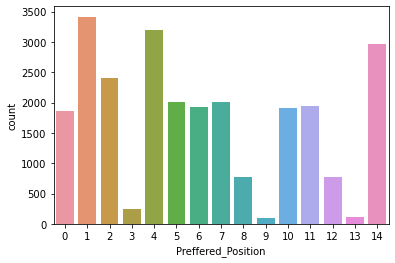

In [12]:
#Distribiution of preffered postions
sns.countplot(df['Preffered_Position'])
plt.show()

In [13]:
labels = np.array(df['Preffered_Position'])
df= df.drop('Preffered_Position', axis = 1)

In [14]:
train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25, random_state = 10)

In [15]:
#grid for random forest
grid_forest = { 
    'n_estimators': [10,50,100,200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [16]:
#Random forest with grid search cross validation
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_forest, cv= 5)
rf_cv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [18]})

In [17]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'random_state': 18}

In [18]:
#Using the best parameters of RF given by Grid Search CV
rf_best=RandomForestClassifier(criterion= 'entropy',max_depth= 8,max_features= 'sqrt',n_estimators= 100,random_state= 18)
rf_best.fit(train_x,train_y)
prediction_rf = rf_best.predict(test_x)

print("Accuracy Score:", metrics.accuracy_score(test_y,prediction_rf))


Accuracy Score: 0.5335099750623441


In [19]:
#grid for LGB
param_grid_lgb = {
    'n_estimators': [50, 75],
    'max_depth': [5,10],
    'num_leaves': [50, 75],
}

In [20]:
#LGB with grid search cross validation
lgb_cv = GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_lgb, cv= 5)
lgb_cv.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [50, 75],
                         'num_leaves': [50, 75]})

In [21]:
lgb_cv.best_params_

{'max_depth': 5, 'n_estimators': 50, 'num_leaves': 50}

In [22]:
#Using the best parameters of LGB given by Grid Search CV
lgb= LGBMClassifier()
lgb_best = lgb.set_params(max_depth= 5, n_estimators= 50, num_leaves = 50)

lgb_best.fit(train_x,train_y)
prediction_lgb = lgb_best.predict(test_x)

print("Accuracy Score:", metrics.accuracy_score(test_y,prediction_lgb))

Accuracy Score: 0.5249376558603491


In [23]:
# Feature importance -RF

#RF model fit
rf_best.fit(train_x, train_y)
feature_importances_rf_best= rf_best.feature_importances_

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':train_x.columns, 'fea_imp':feature_importances_rf_best})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)



,cols,fea_imp
6,Sliding_Tackle,0.097254
7,Standing_Tackle,0.095682
5,Marking,0.093235
26,Finishing,0.063801
10,Attacking_Position,0.055005
11,Interceptions,0.049045
14,Crossing,0.038527
4,Dribbling,0.036483
33,GK_Diving,0.033441
12,Vision,0.032264


In [24]:
# Feature importance -LGBM

#lightGBM model fit
lgb_best.fit(train_x, train_y)
lgb_best.feature_importances_

feature_importances_lgb_best = (lgb_best.feature_importances_ / sum(lgb_best.feature_importances_))

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':train_x.columns, 'fea_imp':feature_importances_lgb_best})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
14,Crossing,0.066200
5,Marking,0.052623
6,Sliding_Tackle,0.047192
26,Finishing,0.044586
24,Heading,0.037580
18,Speed,0.036657
11,Interceptions,0.036222
0,Rating,0.034973
12,Vision,0.034539
16,Long_Pass,0.034430


In [25]:
#Random Forest Accuracy after RFE
rf_best=RandomForestClassifier(criterion= 'entropy',max_depth= 8,max_features= 'sqrt',n_estimators= 100,random_state= 18)
n_features_to_select = 15

rfe_best_rec = RFE(rf_best, n_features_to_select=n_features_to_select)
rfe_best_rec.fit(train_x, train_y)

predictions_rfe_best_rfe = rfe_best_rec.predict(test_x)

print("Accuracy Score:", metrics.accuracy_score(test_y,predictions_rfe_best_rfe))

Accuracy Score: 0.5356920199501247


In [26]:
#LGB Accuracy after RFE
lgb_best = LGBMClassifier(max_depth= 5, n_estimators= 50, num_leaves = 50)
n_features_to_select = 15

lgb_best_rec = RFE(lgb_best, n_features_to_select=n_features_to_select)
lgb_best_rec.fit(train_x, train_y)

predictions_lgb_best_rfe = lgb_best_rec.predict(test_x)

print("Accuracy Score:", metrics.accuracy_score(test_y,predictions_lgb_best_rfe))

Accuracy Score: 0.4816084788029925


In [27]:
#I will only will use the features with feature importance between (1, 0.025) for both of the methods
selected_features_rf = df[['Sliding_Tackle','Standing_Tackle','Marking','Finishing',"Attacking_Position","Interceptions","Crossing",
"Dribbling","GK_Diving","Vision","Skill_Moves","Preffered_Foot_Left","Long_Pass","Preffered_Foot_Right","Heading","GK_Positioning",
"GK_Handling"]]
selected_features_lgb = df[["Crossing","Marking","Sliding_Tackle","Finishing","Heading","Speed","Interceptions","Rating","Vision",
"Long_Pass","Standing_Tackle","Strength","Acceleration","Dribbling","Attacking_Position","Jumping","Stamina"]]

train_x_rf, test_x_rf, train_y_rf, test_y_rf = train_test_split(selected_features_rf, labels, test_size = 0.25, random_state = 10)

train_x_lgb, test_x_lgb, train_y_lgb, test_y_lgb = train_test_split(selected_features_lgb, labels, test_size = 0.25, random_state = 10)

In [28]:
rf_cv.fit(train_x_rf, train_y_rf)
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [29]:
rf_best_selected=RandomForestClassifier(criterion= 'entropy',max_depth= 8,max_features= 'sqrt',n_estimators= 200,random_state= 18)

rf_best_selected.fit(train_x_rf,train_y_rf)
prediction_rf_selected = rf_best_selected.predict(test_x_rf)

print("Accuracy Score:", metrics.accuracy_score(test_y_rf,prediction_rf_selected))

Accuracy Score: 0.5378740648379052


In [30]:
lgb_cv.fit(train_x_lgb,train_y_lgb)
lgb_cv.best_params_

{'max_depth': 5, 'n_estimators': 50, 'num_leaves': 50}

In [31]:
lgb_best_selected=lgb.set_params(max_depth= 5, n_estimators= 50, num_leaves = 50)

lgb_best_selected.fit(train_x_lgb,train_y_lgb)
prediction_lgb_selected = lgb_best_selected.predict(test_x_lgb)

print("Accuracy Score:", metrics.accuracy_score(test_y_lgb,prediction_lgb_selected))

Accuracy Score: 0.4858167082294264


In [32]:
##Prediction without feauture selection
acc1=metrics.accuracy_score(test_y,prediction_rf)
acc2=metrics.accuracy_score(test_y,prediction_lgb)
#Feaure selection with RFE
acc3=metrics.accuracy_score(test_y,predictions_rfe_best_rfe)
acc4=metrics.accuracy_score(test_y,predictions_lgb_best_rfe)
#Feature selection by feature imporatnce 
acc5=metrics.accuracy_score(test_y_rf,prediction_rf_selected)
acc6=metrics.accuracy_score(test_y_lgb,prediction_lgb_selected)

In [35]:
print("Base Accuracy of Random Forest:",acc1)
print("Feature selection with RFE accuracy of Random Forest:",acc3)
print("Feature selection by feature imporatnce accuracy of Random Forest:",acc5)

Base Accuracy of Random Forest: 0.5335099750623441
Feature selection with RFE accuracy of Random Forest: 0.5356920199501247
Feature selection by feature imporatnce accuracy of Random Forest: 0.5378740648379052


In [36]:
print("Base Accuracy of LGBM:",acc2)
print("Feature selection with RFE accuracy of LGBM:",acc4)
print("Feature selection by feature imporatnce accuracy of LGBM:",acc6)

Base Accuracy of LGBM: 0.5249376558603491
Feature selection with RFE accuracy of LGBM: 0.4816084788029925
Feature selection by feature imporatnce accuracy of LGBM: 0.4858167082294264
